In [1]:
import numpy as np
from matplotlib import pylab as plt 
import math as mth

Приветствую проверяющего!
Я выбрал распределение Накагами. Это двупараметрическое одномерное распределение вероятности, связанное с гамма-распределением вероятностей.

Функция плотности распределения выглядит следующим образом:

$f(x,\mu,w)= \dfrac{2\mu^\mu}{\Gamma(\mu)w^\mu}x^{2\mu-1}\exp(-\dfrac{\mu}{w}x^2)$

где $\mu$ и $w$ параметры распределения, которые я выбрал равными $\mu=1$ $w=1$

In [2]:
def Nakagami(x, nu, w):                                                         # функция распределения
  return 2*nu**nu/(mth.gamma(nu)*w**nu)*x**(2*nu-1)*mth.e**(-nu/w*x**2) 

In [3]:
def generat(f, N, start, finish):                                               # функция, генерирующая выборку объема N, элементы которого имеют распределение плотностиf 
  sample = np.linspace(start, finish, 1000)
  sum = 0
  y = np.array([])
  for x in sample:
    v = f(x,nu=1,w=1)
    sum += v
    y = np.append(y, v)
  y = y/sum
  return np.random.choice(sample, p=y, size=N), sample

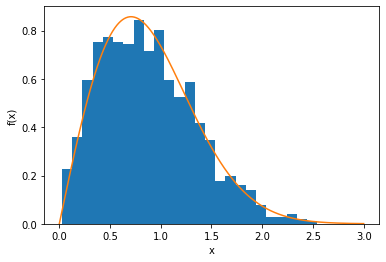

In [4]:
z, x = generat(Nakagami, N=1000, start=0, finish=3)                             # подставляем вместо f нашу функцию Nakagami
plt.hist(z, density=True, bins=25)
plt.plot(x, Nakagami(x,1,1));
plt.xlabel('x');
plt.ylabel('f(x)');


Нужно сгенерировать 1000 выборок объема n и взять среднее значение каждой выборки. На выходе получаем массив выборочных средних

In [5]:
def generate_samples(n, generate, f, N=1000):                                   
  samples = np.array([])
  for i in range(N):
    samples = np.append(samples, np.mean(generat(f, n, 0, 3)[0]))
  return samples


Даллее аппроксимируем выборочные средние нормальным распределением. Для этого берем нормальное распределение с математическим ожиданием исходного распределения Накагами и дисперсией исходного распределения деленное на объем выборки n.

In [6]:
def approx_norm(n, x, disp, mean):
  disp = disp/n
  return 1/(disp*2*mth.pi)**0.5*mth.e**(-(x-mean)**2/(2*disp))

дисперсия              $= w\left(1-\dfrac{1}{\mu}\left(\dfrac{\Gamma(\mu+0.5)}{\Gamma(\mu)}\right)^2\right)$

математическое ожидание $= \dfrac{\Gamma(\mu+0.5)}{\Gamma(\mu)\left(\dfrac{w}{\mu}\right)^{0.5}}$

In [7]:
nu = 1
w = 1
disp = w*(1-1/nu*(mth.gamma(nu+0.5)/mth.gamma(nu))**2)
mean = mth.gamma(nu+0.5)/mth.gamma(nu)*(w/nu)**0.5

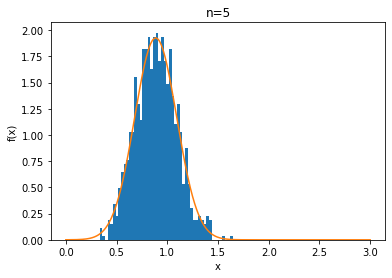

In [8]:
plt.hist(generate_samples(5, generat, Nakagami), bins=50, density=True);
plt.plot(x, approx_norm(5, x, disp, mean));
plt.xlabel('x');
plt.ylabel('f(x)');
plt.title('n=5');

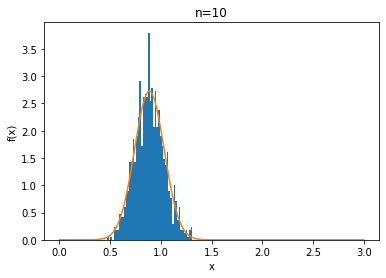

In [9]:
plt.hist(generate_samples(10, generat, Nakagami), bins=50, density=True);
plt.plot(x, approx_norm(10, x, disp, mean));
plt.xlabel('x');
plt.ylabel('f(x)');
plt.title('n=10');

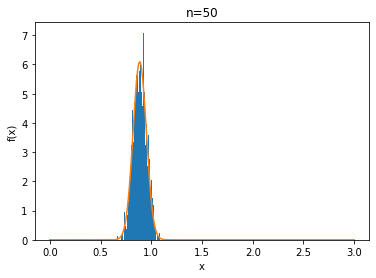

In [10]:
plt.hist(generate_samples(50, generat, Nakagami), bins=50, density=True);
plt.plot(x, approx_norm(50, x, disp, mean));
plt.xlabel('x');
plt.ylabel('f(x)');
plt.title('n=50');

По графикам видно, что выборочные средние, сгенерированные с помощью распределения Накагами, имеют нормальное распределение. С увеличением объема выборок аппроксимация нормальным распределением становится все точнее.